# Klasifikasi-Headline Berita

Tujuan dari proses klasifikasi ini adalah untuk membedakan anatara berita hoax dan berita asli. Karena berita hoax tertuma di tengah perkembangan AI saat ini sudah marak bertebaran. Hal ini dapat menimbulkan keresahan di tengah masyarakat

In [ ]:
# import library yang dibutuhkan
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import LSTM, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from itertools import chain
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [2]:
# menginport data dari file csv
df = pd.read_csv('Data/indonesian-news-title.csv')

**Noted:** 

Pada tahap ini yaitu melakukan import data csv dengan menggunakan read_csv yang terdapat pada library pandas, pada langkah ini tidak perlu menggunakan dataframe karena data CSV sendiri sudah berbentuk tabel

In [3]:
# menampilkan 10 daat teratas dalam dataset
df.head(10)

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance
5,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,RI Bakal Punya Destinasi Wisata Sejarah Islam ...,finance
6,02/26/2020,https://finance.detik.com/perencanaan-keuangan...,Cara Biar Nggak Tertipu Travel Umrah Abal-abal...,finance
7,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"DPR Kritik Cara Anies Atasi Banjir, Pesan Kera...",finance
8,02/26/2020,https://finance.detik.com/moneter/d-4916086/ja...,Jadi Korban Gagal Bayar Asuransi? Bisa Mengadu...,finance
9,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Erick Thohir: BUMN Bukan Badan Usaha Milik Nen...,finance


In [4]:
# pada tahap ini yaitu melihat kategori unik yang ada pada dataset
df['category'].unique()

array(['finance', 'food', 'health', 'hot', 'inet', 'news', 'oto', 'sport',
       'travel'], dtype=object)

In [5]:
# menampilkan 10data teratas dari kategori 'inet'
df[df['category'] == 'oto'].head(10)

,date,url,title,category
77732,05/06/2020,https://oto.detik.com/foto-oto/d-5005197/elega...,"Elegan dan Misterius, Ini Wujud New MINI Count...",oto
77733,05/06/2020,https://oto.detik.com/berita/d-5005217/seluruh...,Seluruh Moda Transportasi Boleh Beroperasi Lag...,oto
77734,05/06/2020,https://oto.detik.com/berita/d-5005192/tokcer-...,"Tokcer, Penjualan MINI Naik 16% di Tengah Pand...",oto
77735,05/06/2020,https://oto.detik.com/berita/d-5005162/12-hari...,12 Hari Larangan Mudik: Polda Metro Putar Bali...,oto
77736,05/06/2020,https://oto.detik.com/berita/d-5005150/apa-kab...,Apa Kabar Denda Rp 100 Juta untuk Pemudik Naka...,oto
77737,05/06/2020,https://oto.detik.com/berita/d-5005118/mau-gad...,Mau Gadai Mobil atau Motor? Ini Rumus Pegadaia...,oto
77738,05/06/2020,https://oto.detik.com/mobil/d-5005059/spesifik...,Spesifikasi Lengkap New MINI Countryman Blackh...,oto
77739,05/06/2020,https://oto.detik.com/berita/d-5004963/transpo...,"Transportasi ke Luar Daerah Dibuka, Corona Dik...",oto
77740,05/06/2020,https://oto.detik.com/berita/d-5004881/menhub-...,"Menhub Izinkan Moda Transportasi Beroperasi, S...",oto
77741,05/06/2020,https://oto.detik.com/mobil/d-5004853/mini-cou...,"MINI Countryman Blackheath Hadir di Indonesia,...",oto


**Noted** 

pada tahap ini adalah melihat kategori apa saja yang ada didalam dataset. Karena ada beberapa kategori yang menggunakan singkatan hal tesebut dapat membingungkan dalam mengartikan kategori yang ada seoerti inet, dan oto. maka pada langkah preprocessing data nantinya saya akan mengubah kategori tersebut agar dapat lebih mudah untuk dipahami, dimana inet --> internet, dan oto --> otomotif.

In [6]:
# melakukan pengecekan data null pada dataset
df.isnull().sum()

date        0
url         0
title       0
category    0
dtype: int64

**Noted**

dari hasil yang didapatkan tidak terdapat data null pada dataset sehingga dapat dilanjutkan untuk proses berikutnya

## Preprocessing Data

In [7]:
# mengubah nilai dalam kolom category
df.loc[df['category'] == 'inet', 'category'] = 'internet'
df.loc[df['category'] == 'oto', 'category'] = 'otomotif'

In [8]:
df['category'].unique()

array(['finance', 'food', 'health', 'hot', 'internet', 'news', 'otomotif',
       'sport', 'travel'], dtype=object)

**Noted**

seperti yang telah dijelaskan bahwa code diatas berfungsi untuk mengubah nilai inet, dan oto pada kolom kategori. Hal tersebut bertujuan untuk mempudah dalam memahami hasil prediksi nantinya

In [9]:
# menghapus kolom yang tidak diperlukan
df= df.drop(columns=['date', 'url'], axis=1)

In [10]:
# menhapus baris di mana kategori adalah 'hot' atau 'news'
df = df[~df['category'].isin(['hot', 'news'])]

**Noted** 

alasan menghapus baris kategori dengan value hot dan news yaitu karena tidak relavan saja seperti bagaimana ciri ciri berita news dan hot. karena setiap waktu berita terus berkembang cukup cepat.

In [11]:
df.head(20)

,title,category
0,Kemnaker Awasi TKA di Meikarta,finance
1,BNI Digitalkan BNI Java Jazz 2020,finance
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance
5,RI Bakal Punya Destinasi Wisata Sejarah Islam ...,finance
6,Cara Biar Nggak Tertipu Travel Umrah Abal-abal...,finance
7,"DPR Kritik Cara Anies Atasi Banjir, Pesan Kera...",finance
8,Jadi Korban Gagal Bayar Asuransi? Bisa Mengadu...,finance
9,Erick Thohir: BUMN Bukan Badan Usaha Milik Nen...,finance


In [12]:
# Fungsi untuk memuat kamus slang dari file
def load_slang(slangpath):
    # Inisialisasi dictionary kosong untuk menyimpan pasangan kata slang dan formal
    slang_dict = {}
    
    # Membuka file slang dengan encoding UTF-8
    with open(slangpath, 'r', encoding='Utf-8') as file:
        for line in file:
            # Menghapus whitespace di awal dan akhir baris
            line = line.strip()
            if line:
                # Memisahkan baris berdasarkan tab
                parts = line.split('\t')
                # Mengambil kata slang (selalu ada di posisi pertama)
                slang = parts[0]
                # Mengambil kata formal (jika ada) dari posisi kedua
                formal = parts[1] if len(parts) > 1 else ""
                # Menyimpan pasangan kata ke dalam dictionary
                slang_dict[slang] = formal
    return slang_dict

# Path ke file slang dictionary
slang_file = "Data/slang_indo.txt"
slng_dict = load_slang(slang_file)

In [13]:
# Fungsi untuk memproses kata slang dalam teks menggunakan kamus slang
def process_slang(text, slang_dict = slng_dict):  
    words = text.split()
    processed_words = []

    for word in words:
         # Mengganti jika slang ditemukan, jika tidak biarkan seperti itu
        processed_word = slang_dict.get(word.lower(), word) 
        processed_words.append(processed_word)

    processed_text = ' '.join(processed_words)
    return processed_text

In [14]:
df['slangprep_title'] = df['title'].apply(process_slang)

In [15]:
df.head(20)

,title,category,slangprep_title
0,Kemnaker Awasi TKA di Meikarta,finance,Kemnaker Awasi TKA di Meikarta
1,BNI Digitalkan BNI Java Jazz 2020,finance,BNI Digitalkan BNI Java Jazz 2020
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,"Terbang ke Australia, Edhy Prabowo Mau Genjot ..."
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...
5,RI Bakal Punya Destinasi Wisata Sejarah Islam ...,finance,RI Bakal Punya Destinasi Wisata Sejarah Islam ...
6,Cara Biar Nggak Tertipu Travel Umrah Abal-abal...,finance,Cara Biar tidak Tertipu Travel Umrah Abal-abal...
7,"DPR Kritik Cara Anies Atasi Banjir, Pesan Kera...",finance,"DPR Kritik Cara Anies Atasi Banjir, Pesan Kera..."
8,Jadi Korban Gagal Bayar Asuransi? Bisa Mengadu...,finance,Jadi Korban Gagal Bayar Asuransi? Bisa Mengadu...
9,Erick Thohir: BUMN Bukan Badan Usaha Milik Nen...,finance,Erick Thohir: BUMN Bukan Badan Usaha Milik Nen...


**Noted**

pada proses ini yaitu melakukan preprocessing kata slang atau kata tidak baku, tujuan dari preprocessing ini berguna untuk meningkatkan akurasi model nantinya, juga mengurangi variasi kalimat yang ada sehingga tidak terlalu banyak variasi kalimat yang ada.

sebagai contoh Kok Nggak Datang Rapat Bahas Banjir, Pak Anies? kemudia dirubah menjadi Kok tidak Datang Rapat Bahas Banjir, Pak Anies?

diaman pada contoh tersebut terdapat kata "nggak" kemudian dirubah menjadi kata baku "tidak"

In [16]:
# Lowercasing dengan mempertahankan akronim

import re

def lowercase_but_keep_acronyms(text):
    # Fungsi untuk proses setiap kata
    def repl(m):
        word = m.group()
        # Jika kata huruf kapital 2-4 huruf -> kembalikan apa adanya (akronim)
        if re.fullmatch(r'[A-Z]{2,4}', word):
            return word
        else:
            return word.lower()

    # Ganti setiap kata dengan fungsi repl
    return re.sub(r'\b\w+\b', repl, text)

df['lowerprep_title'] = df['slangprep_title'].apply(lowercase_but_keep_acronyms)


In [17]:
df.head()

,title,category,slangprep_title,lowerprep_title
0,Kemnaker Awasi TKA di Meikarta,finance,Kemnaker Awasi TKA di Meikarta,kemnaker awasi TKA di meikarta
1,BNI Digitalkan BNI Java Jazz 2020,finance,BNI Digitalkan BNI Java Jazz 2020,BNI digitalkan BNI java jazz 2020
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...","terbang ke australia, edhy prabowo mau genjot ..."
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,OJK siapkan stimulus ekonomi antisipasi dampak...
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,saran buat anies-RK yang mangkir rapat banjir ...


In [18]:
# Hilangkan semua karakter bukan huruf/angka/spasi kecuali tanda strip (-)
df['punctuationprep_title'] = df['lowerprep_title'].apply(lambda x: re.sub(r'[^\w\s-]', ' ', x))

In [19]:
# Tokenisasi teks menggunakan regex untuk Bahasa Indonesia
def tokenize_text(text):
    # Memisahkan teks menjadi token dengan tetap mempertahankan pola kata Bahasa Indonesia
    tokens = re.findall(r'\b[\w-]+\b', text)
    return tokens

# Menerapkan tokenisasi pada kolom stemprep_title
df['tokenized_title'] = df['punctuationprep_title'].apply(tokenize_text)

In [20]:
# Gabungkan stopword Bahasa Indonesia & Inggris
stopword = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

# Hapus stopword dan langsung ubah ke string
df['tokenized_title'].apply(lambda x: [w for w in x if not w in stopword])


0                         [kemnaker, awasi, TKA, meikarta]
1                 [BNI, digitalkan, BNI, java, jazz, 2020]
2        [terbang, australia, edhy, prabowo, genjot, bu...
3        [OJK, siapkan, stimulus, ekonomi, antisipasi, ...
4           [saran, anies-RK, mangkir, rapat, banjir, DPR]
                               ...                        
91012    [ketumpahan, air, panas, pesawat, tuntut, mask...
91013      [foto, bali, 9, destinasi, instagramable, 2020]
91014    [game, bikin, turis, liburan, jepang, cari, ya...
91015    [sekeluarga, didepak, pesawat, maskapai, bilan...
91016     [kapal, raib, segitiga, bermuda, seabad, ketemu]
Name: tokenized_title, Length: 42327, dtype: object

In [22]:
# preprocessing stemming menggunakan Sastrawi
stemmer = StemmerFactory().create_stemmer()

# Terapkan ke DataFrame
df['stemprep_title'] = df['tokenized_title'].apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

In [23]:
df.head()

,title,category,slangprep_title,lowerprep_title,punctuationprep_title,tokenized_title,stemprep_title
0,Kemnaker Awasi TKA di Meikarta,finance,Kemnaker Awasi TKA di Meikarta,kemnaker awasi TKA di meikarta,kemnaker awasi TKA di meikarta,"[kemnaker, awasi, TKA, di, meikarta]","[kemnaker, awas, tka, di, meikarta]"
1,BNI Digitalkan BNI Java Jazz 2020,finance,BNI Digitalkan BNI Java Jazz 2020,BNI digitalkan BNI java jazz 2020,BNI digitalkan BNI java jazz 2020,"[BNI, digitalkan, BNI, java, jazz, 2020]","[bni, digital, bni, java, jazz, 2020]"
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...","terbang ke australia, edhy prabowo mau genjot ...",terbang ke australia edhy prabowo mau genjot ...,"[terbang, ke, australia, edhy, prabowo, mau, g...","[terbang, ke, australia, edhy, prabowo, mau, g..."
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,OJK siapkan stimulus ekonomi antisipasi dampak...,OJK siapkan stimulus ekonomi antisipasi dampak...,"[OJK, siapkan, stimulus, ekonomi, antisipasi, ...","[ojk, siap, stimulus, ekonomi, antisipasi, dam..."
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,saran buat anies-RK yang mangkir rapat banjir ...,saran buat anies-RK yang mangkir rapat banjir ...,"[saran, buat, anies-RK, yang, mangkir, rapat, ...","[saran, buat, anies-rk, yang, mangkir, rapat, ..."


**Noted**

terdapat 3 pemrosesan yang telah dilakukan yaitu lowercasing, removepunctuation, dan stopword removal.

- lowercasing memiliki fungsi untuk mengubah setiap huruf yang ada menjadi huruf kecil misalnya "Kamu" menjadi "kamu". alan tetapi proses ini juga memiliki kekurangan dimana terdapat beberapa kata penting ketika dilakukan proses lowercasing maka kata tersebut dapat berubah secara makna contohnya "US" menjadi "us". maka dari itu pada proses lowercase dilakukan proses pengecekan apakah terdapat huruf kapital 2-4, jika terdapat maka akan dikelompokkan dan akan tetap sepertiitu, jika tidak maka akan dilakukan proses lowercase

- langkah berikutnya yaitu removepunctuation pada proses ini yaitu menghapus semua simbol atau angka yang tidak dibutuhkan nantinya. akan tetapi pada kasus penghapusan angka perlu diperhatikan baik baik karena ada beberapa angka justru ketika angka tersebut dihapus maka dapat mengubah arti dari kalimat yang ada.

- terdapat juga proses stopword removal berfungsi untuk menghapus kata kata umum yang tidak miliki makna dalam suatu kalimat atau penjelasan tertentu.

- proses tokenize juga sangat dibutuhkan dalam melakukan preprocessing data, dikarenakan dapat memisah setiap data baik itu berdasarkan kata atau frasa. Hal ini nantinya agar dapat melanjutkan ke tahap berikutnya yaitu vectorisasi

- terakhir yaitu stemming menggunakan sastrawi. stemming seperti yang diketahui berfungsi untuk mebgubah kata ke bentuk dasarnya. misalnya terdapat kata "memakan" didalam data, setelah meelakukan proses stemming maka akan menjadi "makan". akan tetapi saat menggunakan lib setiap kata otomatis dilakukan lowercase maka dari itu untuk mengatasi hasl tersebut dilakukan proses berikut:

In [ ]:
# drop_columns = ['tokenized_title']
# df = df.drop(columns=drop_columns, axis=1)

In [ ]:
print(type(df['prep_data'][0]))

<class 'list'>


In [27]:
df['prep_data'] = df['stemprep_title'].apply(lambda x: ' '.join(x))

# melakukan proses splitting data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    df['prep_data'], df['category'], test_size=0.2, random_state=42
)

In [ ]:
# Vectorisasi TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [29]:
print('Train size: ', X_train_tfidf.shape)
print('Test size: ', X_test_tfidf.shape)

Train size:  (33861, 15056)
Test size:  (8466, 15056)


**Noted**

pada tahap ini yaitu melakukan proses vectirizasi menggunakan TF-IDF. TF-IDF sendiri yaitu proses megukur sebarap pentingnya suatu kata yang terdapat dalam doc yang relatif terhadap keseluruhan doc yang ada

## Training Model

In [ ]:
# Model 1- Menggunakan SVM
clf = SVC(kernel='rbf')

# Melatih model dengan data training
clf.fit(X_train_tfidf, y_train)

y_pred_svm = clf.predict(X_test_tfidf)

# evaluas model menggunakan metrik akurasi, presisi, recall, dan f1-score
print('Accuracy score : ', accuracy_score(y_test, y_pred))
print('Precision score : ', precision_score(y_test, y_pred, average='weighted'))
print('Recall score : ', recall_score(y_test, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred, average='weighted'))

Accuracy score :  0.8627450980392157
Precision score :  0.8646792779468857
Recall score :  0.8627450980392157
F1 score :  0.8621078254272283


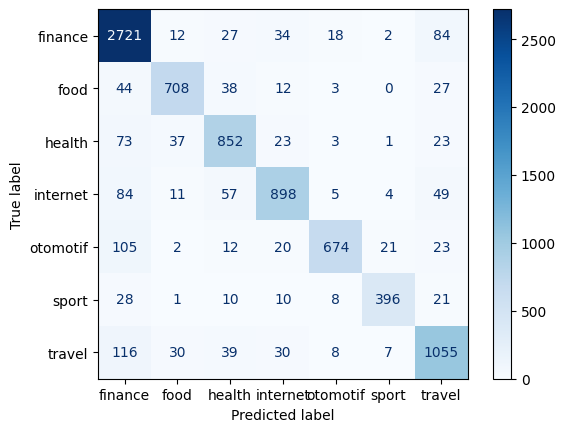

In [33]:

# evaluasi model menggunakan confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

**Noted**

- Accuracy = 86.27%

    - Model memprediksi dengan benar sekitar 86 dari 100 data. Ini meningkat dibandingkan model Naive Bayes sebelumnya (78%).

- Precision = 86.47%

    - Dari semua prediksi positif yang dibuat oleh model, sekitar 86% memang benar.

- Recall = 86.27%

    - Dari semua data yang sebenarnya milik suatu kelas, sekitar 86% berhasil dikenali dengan benar.

- F1 Score = 86.21%

    - Menunjukkan keseimbangan yang sangat baik antara precision dan recall. Ini berarti model tidak hanya akurat, tetapi juga konsisten.

**Confusion Matrix**
- Prediksi untuk semua kategori meningkat dibandingkan Naive Bayes.

- Kelas seperti "finance", "health", dan "internet" diprediksi dengan sangat baik.

- Kategori "travel" juga jauh lebih akurat (1055 benar vs sebelumnya 917).

- Kesalahan antar kategori lebih sedikit, artinya model dapat membedakan antar topik dengan lebih tepat.

In [34]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Calculate evaluation metrics
print('Accuracy score : ', accuracy_score(y_test, y_pred_nb))
print('Precision score : ', precision_score(y_test, y_pred_nb, average='weighted'))
print('Recall score : ', recall_score(y_test, y_pred_nb, average='weighted'))
print('F1 score : ', f1_score(y_test, y_pred_nb, average='weighted'))



Accuracy score :  0.7812426175289393
Precision score :  0.810579276799
Recall score :  0.7812426175289393
F1 score :  0.7771163544786409


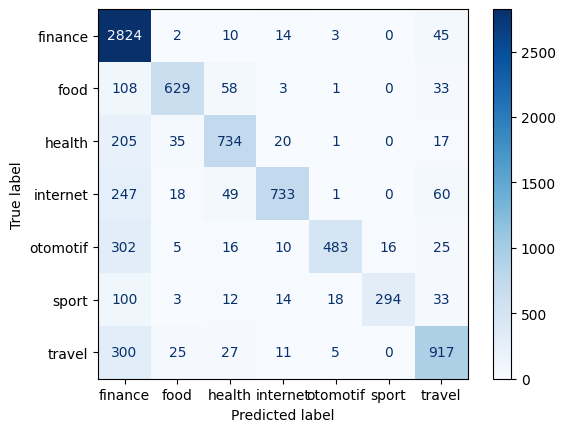

In [35]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, cmap='Blues')
plt.show()

**Noted**

- Accuracy (Akurasi) = 78.12%

    - Artinya, sekitar 78 dari 100 prediksi model sudah benar. Ini menunjukkan performa model secara keseluruhan cukup baik.

- Precision = 81.06%

    - Precision mengukur seberapa akurat model saat memberikan label. Dari semua yang diprediksi sebagai suatu kategori, 81% benar-benar termasuk kategori tersebut.

- Recall = 78.12%

    - Recall menunjukkan kemampuan model menangkap semua data dari kategori tertentu. Sekitar 78% dari total data yang sebenarnya termasuk dalam suatu kategori berhasil dikenali dengan benar oleh model.

- F1 Score = 77.71%

    - F1 score adalah gabungan dari precision dan recall. Nilai ini menunjukkan keseimbangan antara ketepatan dan kemampuan menangkap data, dan cukup solid di sini.

**Confusion matrix**
- Label "finance" diprediksi sangat baik (2824 benar), meskipun ada beberapa salah ke kategori "travel" dan "internet".

- Label "food", "health", dan "internet" juga cukup baik, meskipun kadang keliru dengan satu sama lain.

- Label "otomotif" dan "sport" memiliki akurasi yang lebih rendah, dengan cukup banyak kekeliruan ke kategori "finance" dan lainnya.

- Label "travel" sering tertukar dengan "finance", menunjukkan ada kemiripan konten antar kedua kategori.